# セルオートマトン法を用いた渋滞シミュレーション
セルオートマトン法とは、「状態を持つセルを用意し、あるルールによってセルの状態を変化することによってモデル化する手法」である  
今回この手法を使い、車がある場所を1、ない場所を0とし、交通の流れをシミュレーションする

## 必要なファイルを用意


In [0]:
! git clone -b feature/add_graph https://github.com/hyaken/cellautomata.git
! cp cellautomata/cellautomata/car_class.py .

Cloning into 'cellautomata'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 86 (delta 28), reused 76 (delta 18), pack-reused 0
Unpacking objects: 100% (86/86), done.


## パラメータを設定する
車列の長さ、車両数、実行するステップ数を設定する（CAR_LENGTH >= CAR_NUM とすること）  
ここでの車列とは、サーキット場の道と仮定する  


In [0]:
import car_class

CAR_LENGTH = 30
CAR_NUM = 10     #@param {type: "slider", min: 0, max: 30}
STEPS = 20       #@param {type: "slider", min: 20, max: 100}


## 単純モデル
前に車がいたら止まり、いなかったら進むというモデル

### 車列を生成する
CAR_LENGTH >= CAR_NUM とすること

In [0]:
car_line = car_class.CarLine(CAR_LENGTH, CAR_NUM)
car_line.print()

□□ □  □□□□   □ □□□□   □□     □


### 車列を進める

In [0]:
car_line.run_simple_start(STEPS)

□ □ □ □□□ □   □□□□ □  □ □    □
 □ □ □□□ □ □  □□□ □ □  □ □   □
□ □ □□□ □ □ □ □□ □ □ □  □ □   
 □ □□□ □ □ □ □□ □ □ □ □  □ □  
  □□□ □ □ □ □□ □ □ □ □ □  □ □ 
  □□ □ □ □ □□ □ □ □ □ □ □  □ □
□ □ □ □ □ □□ □ □ □ □ □ □ □  □ 
 □ □ □ □ □□ □ □ □ □ □ □ □ □  □
□ □ □ □ □□ □ □ □ □ □ □ □ □ □  
 □ □ □ □□ □ □ □ □ □ □ □ □ □ □ 
  □ □ □□ □ □ □ □ □ □ □ □ □ □ □
□  □ □□ □ □ □ □ □ □ □ □ □ □ □ 
 □  □□ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ 
 □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ 
 □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ 
 □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ 


*   CAR_NUM = 15 とした時
    * 車列が均等になる様子を見ることが出来る
*   CAR_NUM = 20 とした時
    * 渋滞が発生している
    * 渋滞が後ろに進むように見える



### 車両の密度と流量の関係を見る

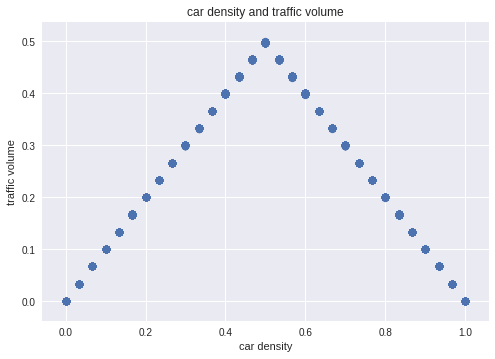

In [0]:
car_class.show_scatter_plot_simple_start(CAR_LENGTH)

### わかったこと


*  交通の基本的な特性を表すことが出来た
    * 車同士が自然に車間を取って、均等になる様子を見ることが出来た
    * 渋滞が後ろに進むという様子を再現できた
    *  グラフから「空いているときは順調に流量が伸びていくが、車が多くなってくると、流れが悪くなり、最終的に0になる」という性質がわかった
*  渋滞になる臨界点は、密度が0.5

## スロースタートルールを適用したモデル
前に車がいたら止まり、いなかったら1ステップ待って進むというモデル  
特に、大型車などは一度止まるとすぐには走りだせないということを考え、モデルに慣性を取り入れてみる

### 車列を生成する

In [0]:
car_line = car_class.CarLine(CAR_LENGTH, CAR_NUM)
car_line.print()

□    □□ □□   □       □ □ □   □


### 車列を進める

In [0]:
car_line.run_slow_start(STEPS)

 □  □  □  □   □ □  □  □  □  □ 
  □  □  □  □   □ □  □  □  □  □
□  □  □  □  □   □ □  □  □  □  
 □  □  □  □  □   □ □  □  □  □ 
  □  □  □  □  □   □ □  □  □  □
□  □  □  □  □  □   □ □  □  □  
 □  □  □  □  □  □   □ □  □  □ 
  □  □  □  □  □  □   □ □  □  □
□  □  □  □  □  □  □   □ □  □  
 □  □  □  □  □  □  □   □ □  □ 
  □  □  □  □  □  □  □   □ □  □
□  □  □  □  □  □  □  □   □ □  
 □  □  □  □  □  □  □  □   □ □ 
  □  □  □  □  □  □  □  □   □ □
□  □  □  □  □  □  □  □  □   □ 
 □  □  □  □  □  □  □  □  □   □
□ □  □  □  □  □  □  □  □  □   
 □ □  □  □  □  □  □  □  □  □  
  □ □  □  □  □  □  □  □  □  □ 
   □ □  □  □  □  □  □  □  □  □


*   CAR_NUM = 15 とした時
    * 単純モデルと異なり、車列が均等にならず、渋滞が発生することがある
*   CAR_NUM = 10 とした時
    * 単純モデルより1セル分多く車間を取った状態が、最も交通量が多い状態となる

### 車両の密度と流量の関係を見る

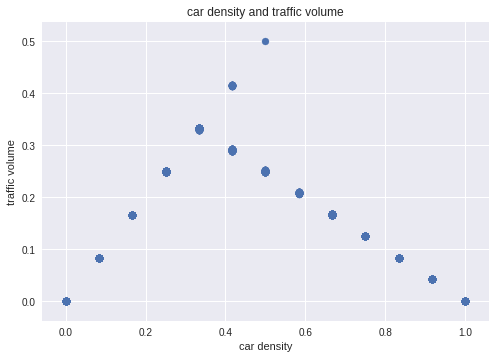

In [0]:
car_class.show_scatter_plot_slow_start(CAR_LENGTH)

*  空いている時に伸びていくグラフが一部飛び出している
    * 単純モデルのような交互な車列であれば、渋滞臨界点と同じ交通量が出せる
    * しかし、この状態で、どこかのセルが止まってしまうと、元の交互の状態には戻れない（渋滞を解消するには、車の台数を減らすしかない）
    * つまり、「渋滞直前の車間が詰まった状態」を再現していることがわかる

### わかったこと
*  サグ部や合流部といった渋滞が起きやすい場所でのシミュレーション結果を得ることが出来た
    * 一度発生してしまった渋滞を解消するには、車の台数を減らすしかない
    * 車間距離を多めにとることは、渋滞解消につながる